<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/EvaluateModelsGivenPredictionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [8]:
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_groundtruth_orig_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_groundtruth_orig_pos.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_groundtruth_pos_interactions.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_groundtruth_neg_maineff.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz

--2020-05-22 10:27:15--  https://github.com/kundajelab/feature_interactions/raw/8263442/av/data/test_toanalyze_orig_neg_labels.txt.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/82634428ccf5d73f98ed60c6431801bc272ec032/av/data/test_toanalyze_orig_neg_labels.txt.gz [following]
--2020-05-22 10:27:16--  https://raw.githubusercontent.com/kundajelab/feature_interactions/82634428ccf5d73f98ed60c6431801bc272ec032/av/data/test_toanalyze_orig_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10835 (11K) [application/octet-stream]
Saving to: ‘test_toanalyz

In [0]:
!gunzip -f *.gz

In [10]:
!md5sum *

md5sum: model_preds: Is a directory
7579af8c7f14878608efef26cb6cd345  model_preds.tgz
md5sum: sample_data: Is a directory
8e52285ee2f15517a1260686c8e7be73  shuff_toanalyze_orig_oraclepred_neg.txt
0c3212b2a62a223c74bcb6f92257abfb  shuff_toanalyze_orig_oraclepred_pos.txt
8b8986c8d1b04a707a08bab0ad6c2a7e  test_toanalyze_groundtruth_orig_neg.txt
89434eb455b64fb551915e8f069d5570  test_toanalyze_groundtruth_orig_pos.txt
db8bca2c8062d6deac54ea900a2f8570  test_toanalyze_groundtruth_pos_interactions.txt
46a3795781b463582902f256cf067ffe  test_toanalyze_orig_neg_labels.txt
e9a2286f5839f28d779c326974fd3351  test_toanalyze_orig_pos_labels.txt
1018018711c20e75213022f9281fc614  trained_models.tgz
4d8197807ceb9b53fb144d378e287962  train_toanalyze_orig_neg_labels.txt
f4927967e916c5a64f5506a86eacbdc3  train_toanalyze_orig_pos_labels.txt


In [4]:
!wget https://github.com/kundajelab/feature_interactions/raw/619bc75/av/model_preds.tgz

--2020-05-22 10:26:59--  https://github.com/kundajelab/feature_interactions/raw/619bc75/av/model_preds.tgz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/619bc7523b287c1c3bb31ec19a5223feecb099ab/av/model_preds.tgz [following]
--2020-05-22 10:26:59--  https://raw.githubusercontent.com/kundajelab/feature_interactions/619bc7523b287c1c3bb31ec19a5223feecb099ab/av/model_preds.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47392316 (45M) [application/octet-stream]
Saving to: ‘model_preds.tgz’

model_preds.tgz     100%[===================>]  45.20M   108MB/s    in 0.

In [0]:
!tar -xzf model_preds.tgz model_preds

In [0]:
import numpy as np


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def inverse_anscombe_transform(vals):
  return np.square(vals/2.0) - 3.0/8


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")

train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")

shuff_toanalyze_orig_oraclepred_neg =\
  inverse_anscombe_transform(
      load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt"))
shuff_toanalyze_orig_oraclepred_pos =\
  inverse_anscombe_transform(
      load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt"))

In [0]:
from collections import namedtuple
import scipy.stats
import h5py


def compute_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels):
  assert np.min(orig_preds) > (-3.0/8), np.min(orig_preds)
  assert np.min(labels) > (-3.0/8), np.min(labels)
  #for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8) - the reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < -3.0/8):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < -3.0/8))
    maineff_preds = np.maximum(maineff_preds, -3.0/8)
  
  maineffpreds_loss = compute_loss(preds=maineff_preds, labels=labels)
  origpreds_loss = compute_loss(preds=orig_preds, labels=labels)

  return ((maineffpreds_loss - origpreds_loss),
          maineffpreds_loss, origpreds_loss)


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])


def get_interactioneffectdata(modelpredsfile, perturbedseqskey):
  model_h5 = h5py.File(modelpredsfile, "r")
  orig_preds = np.array(model_h5[perturbedseqskey]['orig_onehot_preds'])
  Aoff_preds = np.array(model_h5[perturbedseqskey]['Aoff_onehot_preds'])
  Boff_preds = np.array(model_h5[perturbedseqskey]['Boff_onehot_preds'])
  bothoff_preds = np.array(model_h5[perturbedseqskey]['bothoff_onehot_preds'])
  model_h5.close()

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   
   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",
   
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "test_toanalyze_lossimprovement_mannwhit",
   "test_v_controltest_lossimp_mannwhit",
   "test_v_controltest_intereff_mag_mannwhit",
   
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_mannwhit",
   "train_v_controltrain_lossimp_mannwhit",
   "train_v_test_lossimp_mannwhit",
   "train_v_controltrain_intereff_mag_mannwhit",

   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])


def perform_interaction_analysis(modelpredsfile, test_toanalyze_labels,
                                 train_toanalyze_labels,
                                 shuff_toanalyze_oraclepreds):

  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='test_toanalyze_perturbedseqs')
  controltest_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltest_toanalyze_perturbedseqs')

  (test_toanalyze_lossimprovement, test_toanalyze_maineffpreds_loss,
   test_toanalyze_origpreds_loss)= compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels)
  controltest_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltest_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltest_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='train_toanalyze_perturbedseqs')
  controltrain_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltrain_toanalyze_perturbedseqs')
  
  (train_toanalyze_lossimprovement, train_toanalyze_maineffpreds_loss,
   train_toanalyze_origpreds_loss) = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels)
  controltrain_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltrain_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltrain_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='shuff_toanalyze_perturbedseqs')
  shuff_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  test_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=test_toanalyze_maineffpreds_loss,
    y=test_toanalyze_origpreds_loss,
    alternative="greater")
  test_v_controltest_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=controltest_toanalyze_lossimprovement,
      alternative="greater")
  test_v_controltest_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltest_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  train_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=train_toanalyze_maineffpreds_loss,
    y=train_toanalyze_origpreds_loss,
    alternative="greater")
  train_v_controltrain_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=controltrain_toanalyze_lossimprovement,
      alternative="greater")
  train_v_controltrain_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(train_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltrain_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,
      
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      test_toanalyze_lossimprovement_mannwhit=
        test_toanalyze_lossimprovement_mannwhit,
      test_v_controltest_lossimp_mannwhit=
        test_v_controltest_lossimp_mannwhit,
      test_v_controltest_intereff_mag_mannwhit=
        test_v_controltest_intereff_mag_mannwhit,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,
      train_toanalyze_lossimprovement_mannwhit=
        train_toanalyze_lossimprovement_mannwhit,
      train_v_controltrain_lossimp_mannwhit=
        train_v_controltrain_lossimp_mannwhit,
      train_v_controltrain_intereff_mag_mannwhit=
        train_v_controltrain_intereff_mag_mannwhit,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )
  


In [0]:
import glob

MODEL_PREDS_FOLDER = "model_preds"
negcontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*_seed*.h5")
poscontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*_seed*.h5")
#negcontrol_modelfiles = glob.glob("trained_models//negcontrol_*_seed100*.h5")
#poscontrol_modelfiles = glob.glob("trained_models//poscontrol_*_seed100*.h5")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

In [14]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analyis_on_multiple_models(
    modelpredsfiles,
    test_toanalyze_labels,
    train_toanalyze_labels,
    shuff_toanalyze_oraclepreds
    ):
  results = OrderedDict()
  for modelpredsfile in modelpredsfiles:
    print("On model", modelpredsfile)
    interaction_analysis = perform_interaction_analysis(
      modelpredsfile=modelpredsfile,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds
      )
    results[modelpredsfile.split("/")[-1]] = interaction_analysis
  return results

negcontrol_results = run_analyis_on_multiple_models(
    modelpredsfiles=negcontrol_modelpredsfiles,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analyis_on_multiple_models(
    modelpredsfiles=poscontrol_modelpredsfiles,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

Using TensorFlow backend.


On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed300_pxmfv.h5
On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed500_fvauo.h5
On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed400_iqqsg.h5
On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5
On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5
On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5
On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5
On model model_preds/negcontrol_model-arch2_l1reg-0.0

In [0]:
import pandas
from collections import OrderedDict

def extract_from_results(arr, extraction_func):
  return [extraction_func(x) for x in arr.values()]

def prepare_results_summary(results):
  fields = [("modelfiles", list(results.keys()))]
  fields += [
  #("test lossimp", extract_from_results(arr=results,
  #extraction_func=lambda x: np.mean(x.test_loss) )),
  ("test lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("test lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("test v controltest lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_lossimp_mannwhit.pvalue)),
  ("test v controltest intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_intereff_mag_mannwhit.pvalue)),
  ("train lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("train lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("train v controltrain lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_lossimp_mannwhit.pvalue)),
  ("train v controltrain intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_intereff_mag_mannwhit.pvalue)),
  ("test intereff - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_intereff_wilcoxon.pvalue)),
  ("test v shuff intereff mag mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_intereff_mag_mannwhit.pvalue)),
  ("test v shuff lossimp mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_lossimp_mannwhit.pvalue)),
  ]
  return pandas.DataFrame(OrderedDict(fields))

negcontrol_results_summary = prepare_results_summary(negcontrol_results)
poscontrol_results_summary = prepare_results_summary(poscontrol_results)

In [16]:
negcontrol_results_summary

,modelfiles,test lossimp - wilcox,test lossimp - mannwhit,test v controltest lossimp - mannwhit,test v controltest intereff mag - mannwhit,train lossimp - wilcox,train lossimp - mannwhit,train v controltrain lossimp - mannwhit,train v controltrain intereff mag - mannwhit,test intereff - wilcox,test v shuff intereff mag mannwhit,test v shuff lossimp mannwhit
0,negcontrol_model-arch2_l1reg-0.0001_seed300_px...,0.999944,0.999806,0.999971,0.0,0.980256,0.973418,0.985102,0.0,7.374583e-303,0.0,0.999750
1,negcontrol_model-arch3_l1reg-0.0001_seed100_te...,1.000000,0.978516,1.000000,0.0,0.995243,0.953796,0.998663,0.0,2.478670e-11,0.0,0.998852
2,negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5,1.000000,1.000000,1.000000,0.0,1.000000,0.999990,1.000000,0.0,1.328049e-256,0.0,0.999980
3,negcontrol_model-arch3_l1reg-0.001_seed500_fva...,0.283376,0.726048,0.416086,0.0,0.108047,0.761255,0.096265,0.0,0.000000e+00,0.0,0.204007
4,negcontrol_model-arch2_l1reg-0.0001_seed100_xv...,0.999975,0.998838,0.999552,0.0,0.999980,0.978842,0.999710,0.0,2.512902e-139,0.0,0.999999
5,negcontrol_model-arch1_l1reg-0.001_seed300_eie...,1.000000,0.999978,1.000000,0.0,0.999992,0.994109,0.998373,0.0,2.656476e-70,0.0,1.000000
6,negcontrol_model-arch2_l1reg-0.0001_seed400_iq...,1.000000,0.999998,1.000000,0.0,1.000000,0.999988,0.999998,0.0,2.454435e-01,0.0,1.000000
7,negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5,0.969801,0.897885,0.992924,0.0,0.001297,0.382895,0.017954,0.0,4.835598e-74,0.0,0.953810
8,negcontrol_model-arch1_l1reg-0.001_seed100_ltf...,1.000000,1.000000,1.000000,0.0,1.000000,0.999999,1.000000,0.0,7.157248e-153,0.0,1.000000
9,negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5,0.999555,0.999868,0.978287,0.0,0.999928,0.998305,0.999683,0.0,8.526319e-04,0.0,0.999997


In [17]:
poscontrol_results_summary

,modelfiles,test lossimp - wilcox,test lossimp - mannwhit,test v controltest lossimp - mannwhit,test v controltest intereff mag - mannwhit,train lossimp - wilcox,train lossimp - mannwhit,train v controltrain lossimp - mannwhit,train v controltrain intereff mag - mannwhit,test intereff - wilcox,test v shuff intereff mag mannwhit,test v shuff lossimp mannwhit
0,poscontrol_model-arch1_l1reg-0.0001_seed300_dh...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,poscontrol_model-arch3_l1reg-0.0_seed300_kikny.h5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,poscontrol_model-arch3_l1reg-0.0_seed100_utcmr.h5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,poscontrol_model-arch2_l1reg-0.001_seed300_ook...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,poscontrol_model-arch2_l1reg-0.0001_seed100_km...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,poscontrol_model-arch2_l1reg-0.0_seed400_ewzvv.h5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,poscontrol_model-arch3_l1reg-0.001_seed400_xug...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,poscontrol_model-arch1_l1reg-0.0_seed200_xfzou.h5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,poscontrol_model-arch3_l1reg-0.001_seed500_yyf...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,poscontrol_model-arch1_l1reg-0.0001_seed100_ao...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


WilcoxonResult(statistic=14145376.0, pvalue=1.0)
-0.017550157765611626


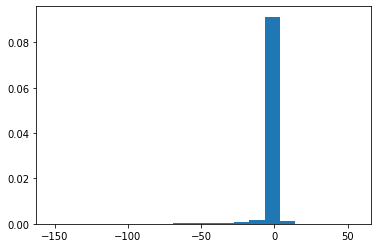

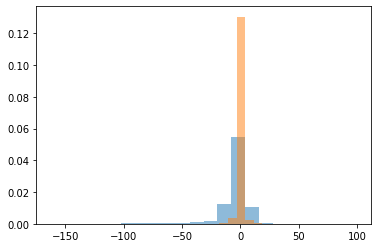

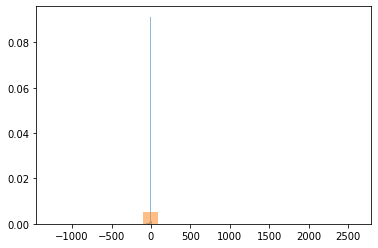

In [18]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

"""plt.hist(np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.test_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.hist(np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.shuff_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.show()""" #doesn't work cos sum on main off on dn shuff seqs can be tiny

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()